In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json 
import sys
import os 

##Scope: 2.	Es “éxito” el que tu video aparezca más días como trending?


In [2]:
# Read original dataset. Date range varies from Nov 2017 up to June 2018
us_csv = "Resources/large_USvideos.csv"

original_df = pd.read_csv(us_csv)
original_df.head(500)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [3]:
#original_df.set_index("video_id")
#original_df.loc['1ZAPwfrtAFY']

In [4]:
# Rename column name 
df= original_df.rename(columns={"video_id": "id"})

#                                        "trending_date": "Trending Date",
#                                        "title": "Title",
#                                        "channel_title": "Channel",
#                                        "category_id": "Category",
#                                        "publish_time": "Publish Date",
#                                        "tags": "Tags",
#                                        "views": "Views",
#                                        "likes": "Likes",
#                                        "dislikes": "Dislikes",
#                                        "comment_count": "Comments"})

df.columns

Index(['id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

## Cleaning Data 

In [5]:
# Convert column Title to propper case  
df["title"] = df.title.str.capitalize()

# Deleting columns with no info 
del df['ratings_disabled']
del df['comments_disabled']
del df['video_error_or_removed']


In [6]:
df.head(100)

,id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description
0,2kyS6SvSYSE,17.14.11,We want to talk about our marriage,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The trump presidency: last week tonight with j...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist superman | rudy mancuso, king bach & le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback lyrics: real or fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I dare you: going bald!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 weeks with iphone x,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy moore & jeff sessions cold open - snl,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 ice cream gadgets put to the test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The greatest showman | official trailer 2 [hd]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,"For now, at least, we have better things to wo..."


In [7]:
# Count how many days each video was trending 
video_by_id = df.set_index("id").groupby(["id"])
video_trending_count = video_by_id.count()["title"]

video_trending_count.sort_values(ascending=False).head()

id
j4KvrAUjn6c    30
QBL8IRJ5yHU    29
t4pRQ0jn23Q    29
iILJvqrAQ_w    29
8h--kFui1JA    29
Name: title, dtype: int64

### 2. Categorias vs videos trending 

In [8]:
## Cual es la categoria que tiene mas videos trending?

# Creating a DataFrame of top 100 videos with more days as "trending" (video_count)
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!! estara bien analizar los 100 videos mas trending? o sera mejor trabajar con 
#toda la muetsra? 
video_frequence_df = df.groupby(['id', 'category_id'])['id'].agg(
                {"video_frequence": len
                }).sort_values("video_frequence", ascending=False).head(100).reset_index()

video_frequence_df.head()

C:\Users\BohuCyn\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


,id,category_id,video_frequence
0,j4KvrAUjn6c,24,30
1,MAjY8mCTXWk,10,29
2,r-3iathMo7o,28,29
3,NBSAQenU2Bk,1,29
4,8h--kFui1JA,10,29


In [9]:
# Read the Json File with categories names and Id so we can show names in the plot

#filepath = os.path.join("Resources/US_category_id.json")
#with open(filepath) as jsonfile:
#    categories_data = json.load(jsonfile)

In [10]:
#definition to transform category id into names
#def video_category_name(df): 
#    for index,row in video_frequence_df.iterrows():
#        x = row['category_id']
#        if video_frequence_df.loc[index,'category_id'] == x: 
#            try: 
#                video_frequence_df.loc[index,"category_name"] = categories_data["items"][x-1]["snippet"]["title"] 
#            except: 
#                pass
#video_category_name(video_frequence_df)
#video_frequence_df.head()
#video_frequence_df.groupby("category_name").id.nunique()

In [11]:
# Category frequence (based on top 100 video frecuence df) 
category_frequence = video_frequence_df.groupby("category_id").id.nunique()
category_frequence.sort_values(ascending=False)
category_frequence_df = pd.DataFrame(category_frequence) 
category_frequence_df= category_frequence_df.rename(columns={'id': "category_frequence"})
category_frequence_df.sort_values('category_frequence',ascending=False).head()

,category_frequence
category_id,
10,29
24,26
26,9
1,6
22,6


In [12]:
# Read the Json File with categories names and Id so we can show names in the plot
from pprint  import pprint 
filepath = os.path.join("Resources/US_category_id.json")
with open(filepath) as jsonfile:
    categories_data = json.load(jsonfile)
# See the json 
pprint(categories_data)


{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
            'id': '1',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Film & Animation'}},
           {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
            'id': '2',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Autos & Vehicles'}},
           {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
            'id': '10',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Music'}},
 

In [13]:
# Make a DF from the Json File to have the categories name and id 

#inspiracion http://localhost:8889/notebooks/06-Python-APIs/2/Activities/04-Stu_Burundi/Solved/Stu_Burundi.ipynb
#!!!!!!!!!!!! el rango le puse 32 pues es la cantidad de categorias, se puede mejorar no teniendo qe poner la cantidad 
x = 0 
category_id_list = []
category_name_list = []
for x in range(32):
    category_id = categories_data["items"][x]["id"]
    category_name = categories_data["items"][x]["snippet"]["title"] 
    x = x+1
    category_id_list.append(category_id)
    category_name_list.append(category_name)
    
#print(category_id_list)
#print(category_name_list)    
#categories_dictionary = zip(category_id_list,category_name_list)
#print(categories_dictionary)

categories_df = pd.DataFrame({ "category_id":category_id_list,
                               "category_name":category_name_list})

categories_df['category_id']=categories_df['category_id'].astype(int)
categories_df.head(50)

,category_id,category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [14]:
category_frequence_df = pd.merge(category_frequence_df,categories_df,how='left',left_on='category_id',right_on='category_id')
category_frequence_df.sort_values('category_frequence',ascending=False).head(33)

,category_id,category_frequence,category_name
1,10,29,Music
8,24,26,Entertainment
10,26,9,Howto & Style
0,1,6,Film & Animation
6,22,6,People & Blogs
7,23,6,Comedy
12,28,5,Science & Technology
5,20,4,Gaming
11,27,3,Education
2,15,2,Pets & Animals


In [15]:

def video_category_name(dF): 
    for index,row in category_frequence_df.iterrows():
        x = row['category_id']
        #x = category_frequence_df.loc[index,'category_id'] 
        if  x == categories_data["items"][0]["id"]: 
            try:
                category_frequence_df.loc[index,"category_name"] = categories_data["items"][0]["snippet"]["title"] 
            except:
                pass
video_category_name(category_frequence_df)
category_frequence_df.sort_values('category_frequence',ascending=False).head(33)

,category_id,category_frequence,category_name
1,10,29,Music
8,24,26,Entertainment
10,26,9,Howto & Style
0,1,6,Film & Animation
6,22,6,People & Blogs
7,23,6,Comedy
12,28,5,Science & Technology
5,20,4,Gaming
11,27,3,Education
2,15,2,Pets & Animals


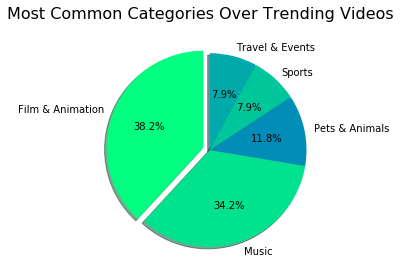

In [38]:
category_frequence = category_frequence_df['category_frequence'].sort_values(ascending=False)[:5]
category_name = category_frequence_df['category_name']
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]
#explode = (0, 0.05, 0, 0)
explode = (0.07, 0, 0, 0, 0)
colors = [ '#00FF80','#00E28E','#008DB8', '#00C69C', '#00AAAA',]
plt.suptitle('Most Common Categories Over Trending Videos', size=16, y=1)
plt.pie(category_frequence, colors=colors ,explode=explode, labels=category_name[:5],
        shadow=True, startangle=90,autopct="%1.1f%%")
plt.axis("equal")
plt.savefig("Images/Most Common Categories Over Trending Videos.png")
plt.show()



Text(0, 0.5, 'Qty of Trending Videos')

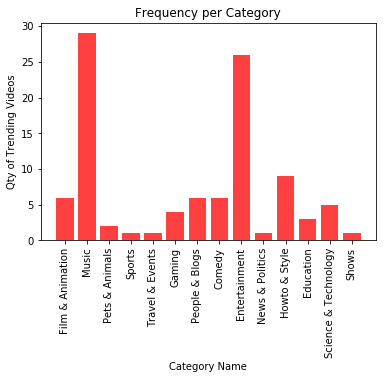

In [17]:
#category_frequence_df.plot(category_name, category_frequence, kind="bar", figsize=(20,3))
plt.bar(category_frequence_df['category_name'], category_frequence_df['category_frequence'], facecolor="red", alpha=0.75, align="center")
plt.xticks(rotation=90)
plt.title("Frequency per Category")
plt.xlabel("Category Name")
plt.ylabel("Qty of Trending Videos")


##  chi-square independence test

In [18]:
# cantidad de dislikes (video controversial = +3000 dislikes)

# Controversial Videos = Videos with more quantity of dislikes 
video_by_id = df.set_index("id").groupby(["id"])
top100videos_dislikes = video_by_id.max()["dislikes"]
top100videos_dislikes_df = pd.DataFrame(top100videos_dislikes)
top100videos_dislikes_df.head()
#top100videos_dislikes_df.mean()

,dislikes
id,
-0CMnp02rNY,332
-0NYY8cqdiQ,54
-1Hm41N0dUs,580
-1yT-K3c6YI,212
-2RVw2_QyxQ,27


In [19]:
# cantidad de views (high views = +2.000.000 views)

import scipy.stats as scs

video_by_id = df.set_index("id").groupby(["id"])
top100videos_views = video_by_id.max()["views"]

top100videos_views_df = pd.DataFrame(top100videos_views)
#top100videos_views_df.sort_values("views",ascending=False)

top100videos_views_df = top100videos_views_df.groupby(['id']).head(50)
top100videos_views_df["dislikes"] = top100videos_dislikes_df["dislikes"]
top100videos_views_df["views"] = top100videos_views_df["views"]


videos_low_views = top100videos_views_df.loc[top100videos_views_df["views"]<2000000].count()
videos_high_views = top100videos_views_df.loc[top100videos_views_df["views"]>2000000].count()
videos_controversial = top100videos_views_df.loc[top100videos_views_df["dislikes"]>3000].count()
videos_no_controversial = top100videos_views_df.loc[top100videos_views_df["dislikes"]<3000].count()
#top100videos_views_df.head()

videos_low_views_no_cont = top100videos_views_df.loc[(top100videos_views_df["views"]<2000000) & (top100videos_views_df["dislikes"]<3000)].views.count()
videos_low_views_cont = top100videos_views_df.loc[(top100videos_views_df["views"]<2000000) & (top100videos_views_df["dislikes"]>3000)].views.count()
videos_high_views_cont = top100videos_views_df.loc[(top100videos_views_df["views"]>2000000) & (top100videos_views_df["dislikes"]>3000)].views.count()
videos_high_views_no_cont = top100videos_views_df.loc[(top100videos_views_df["views"]>2000000) & (top100videos_views_df["dislikes"]<3000)].views.count()

chi = {"Low Views":[videos_low_views_cont,videos_low_views_no_cont],"High Views":[videos_high_views_cont,videos_high_views_no_cont]}
# "Status":["Controversial","No Controversial"]
chi_df = pd.DataFrame(chi)
chi_df

,Low Views,High Views
0,196,695
1,4942,518


In [20]:
# Max views del ultimo dia trending, lo estamos usando como referencia para el chi-square test
top100videos_views_df.head()

,views,dislikes
id,,
-0CMnp02rNY,800359,332
-0NYY8cqdiQ,563746,54
-1Hm41N0dUs,2058516,580
-1yT-K3c6YI,231341,212
-2RVw2_QyxQ,71089,27


In [21]:
#import matplotlib.pyplot as plt
#import numpy as np
#import math
#import seaborn as sns
#import pandas as pd
#%matplotlib inline

#cols = ['Low Views','High Views']



In [22]:
from scipy import stats

#Hypotheses 
#null hypothesis --> H0:There is no statistically significant relationship between status and the # of views per video. 
#alternative hypothesis --> H1:There is a statistically significant relationship between  status and the # of views per video.
#The H0 (Null Hypothesis): There is no relationship between views  and dislikes.
#The H1 (Alternative Hypothesis): There is a relationship between views and dislikes.
#Assumptions
#The following assumptions need to be meet in order for the results of the Chi-square test to be trusted.

#When testing the data, the cells should be counts of cases and not percentages. It is okay to convert to percentages after testing the data
#The levels (groups) of the variables being tested are mutually exclusive
#Each participant contributes to only one cell within the Chi-square table
#The groups being tested must be independent
#The value of expected cells should be greater than 5 for at least 20% of the cells

#views_observed = [videos_low_views_cont, videos_low_views_no_cont, videos_high_views_cont, videos_high_views_no_cont]
#views_expected = [733, 4410,169,1041]

#chi2_stat, p_val, dof, ex = stats.chi2_contingency(views_observed)
#p_val
#stats.chisquare(views_observed, views_expected)

#pvalue = 0.0 <0.01 indicating that there’s slightly less than a 1% chance that we’d observe this distribution 
#if the dice rolls were truly randomized.

In [23]:
# Chi-square test results 

stats.chi2_contingency(chi_df)
#2322 = chi-square value: 
#0.0 = p-value
#1 = dof
# array: expected frequences : all of them are greather than 5 -> then the chi2 test result can be trusted (https://pythonfordatascience.org/chi-square-test-of-independence-python/) 
# We can reject the null hypothesis as the p-value is less than 0.05.
# Thus, the results indicate that there is a relationship between views  and dislikes quantity 

# esta bien que el chi2 sea tan grande? 
# R. There is no reason why you can't have a very large chi squared test statistic if the expectations vary a lot 
#between groups and you have a large sample for each group. In such a case you are nearly certain that the differences 
#between the groups didn't happen by chance. –

# R2. a weak association in a large sample size may also result in p = 0.000.
# Cramér’s V - Formula (https://www.spss-tutorials.com/cramers-v-what-and-why/)

(2322.7464816092597, 0.0, 1, array([[ 720.82475201,  170.17524799],
        [4417.17524799, 1042.82475201]]))

In [24]:
#Now that we know our Chi-square test of independence is significant, we want to test where the relationship is 
#between the levels of the variables. In order to do this, we need to conduct multiple 2×2 Chi-square tests using 
#the Bonferroni-adjusted p-value.By comparing multiple levels (categories) against each other, the error rate of a
#false positive compounds with each test. 
#https://pythonfordatascience.org/chi-square-test-of-independence-python/

#In our example, if we were planning on conducting all possible pairwise comparisons then the formula would be 
#0.05/6 = 0.008. Meaning, a post hoc 2×2 Chi-square test would have to have a p-value less than 0.008 to be significant.

In [25]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

top100videos_views_df.sort_values("dislikes",ascending=False)



Populating the interactive namespace from numpy and matplotlib


,views,dislikes
id,,
QwZT7T-TXT0,37539570,1674420
FlsCjmMhFmw,149376127,1643059
oWjxSkJpxFU,24286474,497847
VYOjWnS4cMY,225211923,343541
_5d-sQ7Fh5M,14161833,291900
LFhT6H6pRWg,1205682,228426
ooyjaVdt-jA,10306119,212976
7C2z4GqqS5E,123010920,206892
V5cOvyDpWfM,21005589,176903


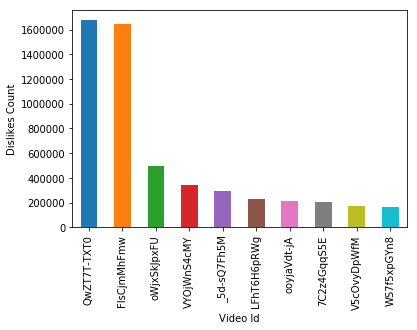

<Figure size 432x288 with 0 Axes>

In [26]:
# hay que sacar 
top100videos_dislikes_df = top100videos_views_df.nlargest(10, 'dislikes')

top100videos_dislikes_chart = top100videos_dislikes_df['dislikes'][:10].plot(kind='bar',stacked=True)

top100videos_dislikes_chart.set_xlabel("Video Id")
top100videos_dislikes_chart.set_ylabel("Dislikes Count")


plt.show()
plt.tight_layout()

KeyboardInterrupt: 

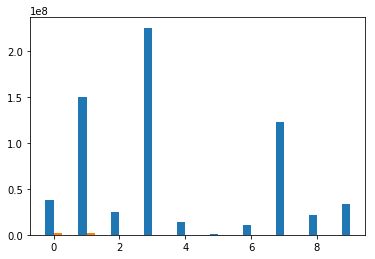

In [27]:
top100videos_dislikes_df.nlargest(20, 'dislikes').plot.bar()

In [ ]:
top100videos_views_df2 = top100videos_views_df.nlargest(20, 'views').plot.bar()

In [ ]:
# Dataset to use
top100videos_dislikes_df = top100videos_views_df.nlargest(100, 'dislikes')

# Axis 
pie_x = top100videos_dislikes_df["views"]
pie_y = top100videos_dislikes_df["dislikes"]

# Plot 
plt.scatter(pie_x, pie_y, alpha=0.8, facecolors="Gold", edgecolors="black",linewidths=1)


# Plot labels,legend and more ##
plt.xlabel("Views Per Video")
plt.ylabel("Qty of dislikes Per Video")
plt.title("Trending Videos Views vs Dislikes")
plt.grid()


## Question 1. Is better to have more views or being trending more days? 
  

In [ ]:
# Filter by the video with more days as trending to compare it with the one with more views 
#df.columns
#df.set_index('id',inplace=True)
#top1_trending_video_views = df.loc['j4KvrAUjn6c'].max()
#top1_trending_video_likes = df.loc['j4KvrAUjn6c'].likes.max()
#top1_trending_video_dislikes = df.loc['j4KvrAUjn6c'].dislikes.max()

# Indicators to plot
top1_trending_video_relation_likes = (df.loc['j4KvrAUjn6c'].likes.max()/   
                                  (df.loc['j4KvrAUjn6c'].likes.max()+df.loc['j4KvrAUjn6c'].dislikes.max()))*100

top1_trending_video_relation_dislikes = (df.loc['j4KvrAUjn6c'].dislikes.max()/   
                                      (df.loc['j4KvrAUjn6c'].likes.max()+df.loc['j4KvrAUjn6c'].dislikes.max()))*100

top1_trending_video_approval_level = round((df.loc['j4KvrAUjn6c'].likes.max() / df.loc['j4KvrAUjn6c'].views.max())*100,1)
top1_trending_video_rejection_level = round((df.loc['j4KvrAUjn6c'].dislikes.max() / df.loc['j4KvrAUjn6c'].views.max())*100,1)


top1_views_video_relation_likes = (df.loc['VYOjWnS4cMY'].likes.max()/   
                                      (df.loc['VYOjWnS4cMY'].likes.max()+df.loc['j4KvrAUjn6c'].dislikes.max()))*100

top1_views_video_relation_dislikes = (df.loc['VYOjWnS4cMY'].dislikes.max()/   
                                      (df.loc['VYOjWnS4cMY'].likes.max()+df.loc['j4KvrAUjn6c'].dislikes.max()))*100

top1_views_video_approval_level = round((df.loc['VYOjWnS4cMY'].likes.max() / df.loc['j4KvrAUjn6c'].views.max())*100,1)
top1_views_video_rejection_level = round((df.loc['VYOjWnS4cMY'].dislikes.max() / df.loc['j4KvrAUjn6c'].views.max())*100,1)

In [ ]:
# DataFrame
battle1 = { 
     'Likes Relationship' : [top1_trending_video_relation_likes,top1_views_video_relation_likes],
     'Dislikes Relationship': [top1_trending_video_relation_dislikes,top1_views_video_relation_dislikes], 
     'Approval Level' : [top1_trending_video_approval_level,top1_views_video_approval_level],
     'Disapproval Level': [top1_trending_video_rejection_level,top1_views_video_rejection_level]
}
battle1_df_transposed = pd.DataFrame(battle1)
battle1_df = battle1_df_transposed.T
battle1_df.columns = ["Top 1 Trending Video","Top 1 Views Video"]
battle1_df.style.format({
    'Likes Relationship': '{:,.2f}'.format,
})
battle1_df

In [ ]:
# Plot 
battle1_df.plot(kind='barh', title="Trending Video VS. More Views Video")
plt.savefig("Q1.Trending_video_vd_more_views_video .png")
